In [18]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

import plotly.graph_objects as go

In [2]:
# importing dataset

dataset = pd.read_csv('feeds_SACP1_old_2021-09-09.csv')
dataset_final = dataset[['Ambient Temp (degC)','Humidity (%)', 'Soil Moisture (%)', 'Capacitor Voltage (mV)', 'Soil Temperature (degC)', 'SACP Cell Current (mA)', 'Soil Voltage (V)', 'Cell Power (mW)']]

# seperating dataset based on time day month and year
dataset['created_at'] = pd.to_datetime(dataset['created_at'])
dataset['year'] = dataset['created_at'].dt.year
dataset['month'] = dataset['created_at'].dt.month
dataset['day'] = dataset['created_at'].dt.day
dataset

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,created_at,entry_id,Ambient Temp (degC),Humidity (%),Soil Moisture (%),Capacitor Voltage (mV),Soil Temperature (degC),SACP Cell Current (mA),Soil Voltage (V),Cell Power (mW),year,month,day
0,2020-06-18 23:29:49,1,20.6875,47.49635,99,2907.74194,22.5000,25.9,0.29460,8,2020,6,18
1,2020-06-18 23:30:58,2,20.6250,47.52944,99,2909.03223,22.5000,26.0,0.29460,8,2020,6,18
2,2020-06-18 23:32:06,3,20.6250,47.55913,99,2909.03223,22.5000,26.0,0.29460,8,2020,6,18
3,2020-06-18 23:33:15,4,20.5625,47.59531,99,2912.90332,22.5000,26.0,0.29460,8,2020,6,18
4,2020-06-18 23:34:23,5,20.4375,47.60892,99,2911.61279,22.4375,26.0,0.29460,8,2020,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385628,2021-08-05 13:31:29,385629,23.8125,83.52943,90,2737.41919,22.2500,16.2,197.62000,3,2021,8,5
385629,2021-08-05 13:32:39,385630,23.7500,61.04981,87,2120.00000,22.2500,16.1,1.61000,0,2021,8,5
385630,2021-08-05 13:33:48,385631,23.6250,57.16352,87,3050.32251,22.2500,16.2,693.62000,18,2021,8,5
385631,2021-08-05 13:34:58,385632,23.4375,55.40501,88,2977.41919,22.2500,16.1,525.60999,10,2021,8,5


<AxesSubplot:>

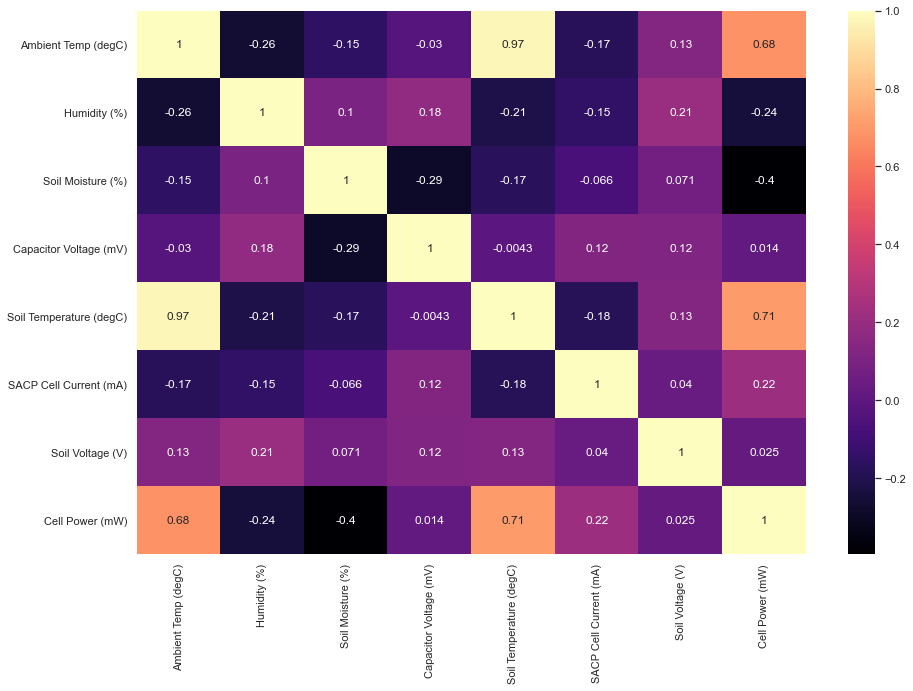

In [3]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data = dataset_final.corr()
sns.heatmap(correlation_data, cmap='magma', annot= True, cbar= True)

In [4]:
dataset_2020 = dataset.loc[(dataset['month'] <= 12) & (dataset['year'] == 2020)]
dataset_2021 = dataset.loc[(dataset['month'] <= 12) & (dataset['year'] == 2021)]
dataset_june_2020 = dataset.loc[(dataset['month'] == 6) & (dataset['year'] == 2020)]
dataset_july_2020 = dataset.loc[(dataset['month'] == 7) & (dataset['year'] == 2020)]
dataset_aug_2020 = dataset.loc[(dataset['month'] == 8) & (dataset['year'] == 2020)]
dataset_sept_2020 = dataset.loc[(dataset['month'] == 9) & (dataset['year'] == 2020)]
dataset_oct_2020 = dataset.loc[(dataset['month'] == 10) & (dataset['year'] == 2020)]
dataset_nov_2020 = dataset.loc[(dataset['month'] == 11) & (dataset['year'] == 2020)]
dataset_dec_2020 = dataset.loc[(dataset['month'] == 12) & (dataset['year'] == 2020)]

dataset_jan_2021 = dataset.loc[(dataset['month'] == 1) & (dataset['year'] == 2021)]
dataset_feb_2021 = dataset.loc[(dataset['month'] == 2) & (dataset['year'] == 2021)]
dataset_mar_2021 = dataset.loc[(dataset['month'] == 3) & (dataset['year'] == 2021)]
dataset_apr_2021 = dataset.loc[(dataset['month'] == 4) & (dataset['year'] == 2021)]
dataset_may_2021 = dataset.loc[(dataset['month'] == 5) & (dataset['year'] == 2021)]
dataset_june_2021 = dataset.loc[(dataset['month'] == 6) & (dataset['year'] == 2021)]
dataset_july_2021 = dataset.loc[(dataset['month'] == 7) & (dataset['year'] == 2021)]
dataset_aug_2021 = dataset.loc[(dataset['month'] == 8) & (dataset['year'] == 2021)]
dataset_sept_2021 = dataset.loc[(dataset['month'] == 9) & (dataset['year'] == 2021)]
dataset_oct_2021 = dataset.loc[(dataset['month'] == 10) & (dataset['year'] == 2021)]
dataset_nov_2021 = dataset.loc[(dataset['month'] == 11) & (dataset['year'] == 2021)]
dataset_dec_2021 = dataset.loc[(dataset['month'] == 12) & (dataset['year'] == 2021)]

Text(0.5, 1.0, 'Temp vs Soil moisture')

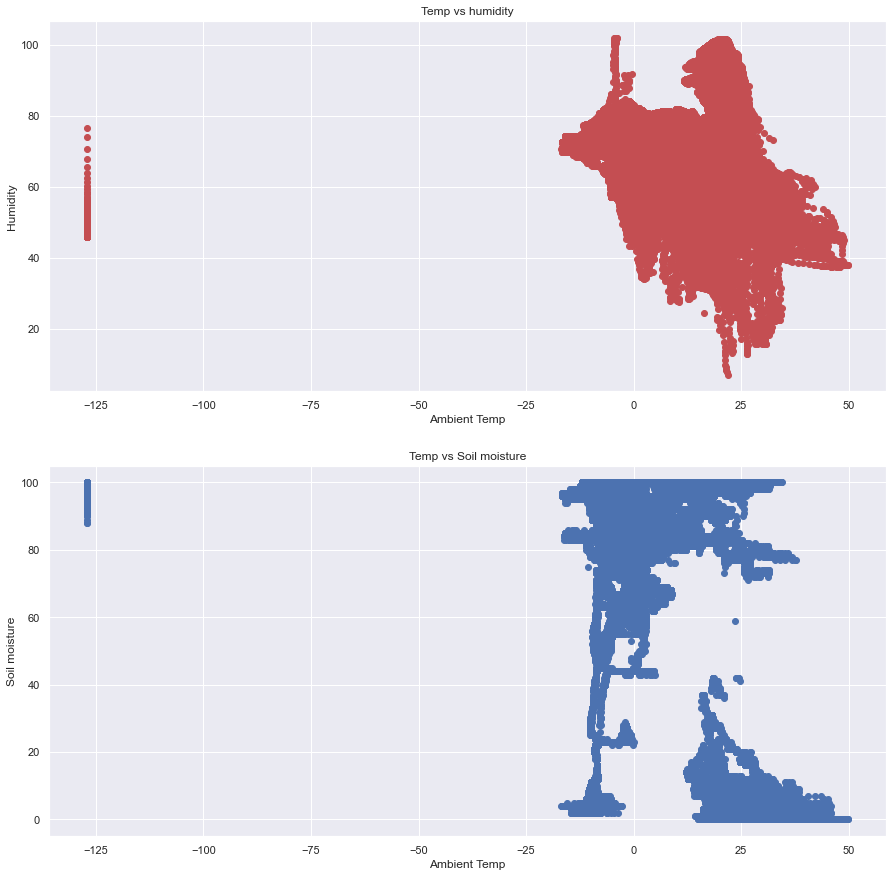

In [19]:
fig = plt.figure(figsize=(15,15))

plt.subplot(211)
plt.scatter(x = dataset['Ambient Temp (degC)'], y = dataset['Humidity (%)'], c = 'r')
plt.xlabel('Ambient Temp')
plt.ylabel('Humidity')
plt.title('Temp vs humidity')

plt.subplot(212)
plt.scatter(x = dataset['Ambient Temp (degC)'], y = dataset['Soil Moisture (%)'], c = 'b')
plt.xlabel('Ambient Temp')
plt.ylabel('Soil moisture')
plt.title('Temp vs Soil moisture')

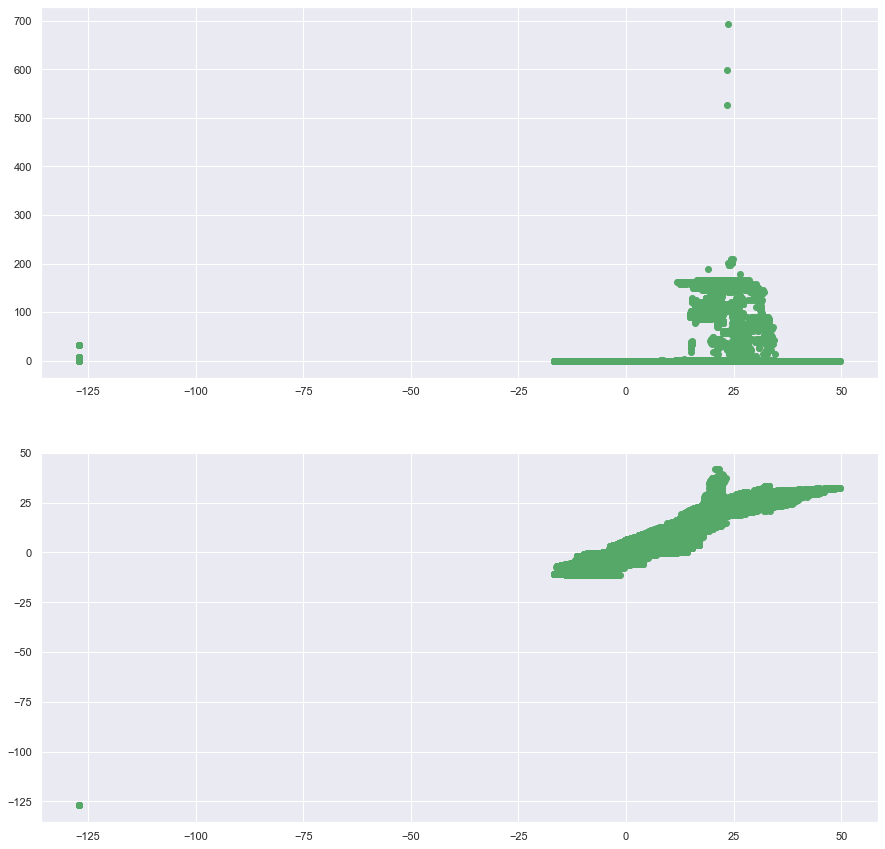

In [21]:
fig = plt.figure(figsize=(15,15))

plt.subplot(211)
plt.scatter(x = dataset['Ambient Temp (degC)'], y = dataset['Soil Voltage (V)'], c = 'g')

plt.subplot(212)
plt.scatter(x = dataset['Ambient Temp (degC)'], y = dataset['Soil Temperature (degC)'], c = 'g')